# Machine Learning model to predict House Price using Linear Regression.

In [22]:
# Importing Packages

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt

In [23]:
# Read the house price dataset and check for null data

df= pd.read_csv("Housing.csv")
df.isnull().sum()

Id                  0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [24]:
df.head()

,Id,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1001,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1002,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1003,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1004,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,1005,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                545 non-null    int64 
 1   price             545 non-null    int64 
 2   area              545 non-null    int64 
 3   bedrooms          545 non-null    int64 
 4   bathrooms         545 non-null    int64 
 5   stories           545 non-null    int64 
 6   mainroad          545 non-null    object
 7   guestroom         545 non-null    object
 8   basement          545 non-null    object
 9   hotwaterheating   545 non-null    object
 10  airconditioning   545 non-null    object
 11  parking           545 non-null    int64 
 12  prefarea          545 non-null    object
 13  furnishingstatus  545 non-null    object
dtypes: int64(7), object(7)
memory usage: 59.7+ KB


In [26]:
df.describe()

,Id,price,area,bedrooms,bathrooms,stories,parking
count,545.00000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,1273.00000,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,157.47222,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1001.00000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,1137.00000,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,1273.00000,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,1409.00000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1545.00000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [27]:
# Covert String data to numerical data 

df['mainroad'].replace(['yes', 'no'], [1, 0], inplace=True)
df['guestroom'].replace(['yes', 'no'], [1, 0], inplace=True)
df['basement'].replace(['yes', 'no'], [1, 0], inplace=True)
df['hotwaterheating'].replace(['yes', 'no'], [1, 0], inplace=True)
df['airconditioning'].replace(['yes', 'no'], [1, 0], inplace=True)
df['prefarea'].replace(['yes', 'no'], [1, 0], inplace=True)
df['furnishingstatus'].replace(['furnished', 'semi-furnished', 'unfurnished'], [0,1,2], inplace=True)
print(df)

       Id     price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    1001  13300000  7420         4          2        3         1          0   
1    1002  12250000  8960         4          4        4         1          0   
2    1003  12250000  9960         3          2        2         1          0   
3    1004  12215000  7500         4          2        2         1          0   
4    1005  11410000  7420         4          1        2         1          1   
..    ...       ...   ...       ...        ...      ...       ...        ...   
540  1541   1820000  3000         2          1        1         1          0   
541  1542   1767150  2400         3          1        1         0          0   
542  1543   1750000  3620         2          1        1         1          0   
543  1544   1750000  2910         3          1        1         0          0   
544  1545   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  aircond

In [28]:
df.columns

Index(['Id', 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [29]:
# Split the data into train and test data

y= df['price']
x= df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom', 'basement', 'hotwaterheating', 
       'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2)

In [30]:
#model training

Ln = LinearRegression()
Ln.fit(x_train, y_train)

LinearRegression()

In [31]:
# Predict the output fot the test data using the fitted model

y_pred= Ln.predict(x_test)
print(y_pred)
print(y_test)

[3858637.72670965 5440273.37754705 3771370.96940849 2695980.35858761
 2847752.69436719 6416220.46730247 5176007.06585782 4251811.69671306
 4980745.4631782  5481540.04829698 3477309.33946041 7833701.48616524
 2868932.42757889 4947185.55733449 6189723.46475423 6048322.01855098
 5761305.4617022  6142333.81299324 4120993.12452398 4214297.663622
 6923353.66313017 4126812.98153276 2547926.33413357 3914028.74912438
 5348224.13078879 3119837.0551282  4257806.43767753 4150402.44251336
 7819325.52136365 6026078.92079413 5701359.68141998 4972799.6146533
 5180226.12500745 4417037.73686069 7290548.37738117 3145450.36522302
 2562003.72199437 6915031.66063948 5844244.51876377 2983540.07030318
 6583412.82799314 2753213.11601032 6709642.11092547 7677373.98125106
 3884568.68863092 5370844.05838626 4437789.707375   5618328.11750137
 3441090.64710527 3174781.45037889 5241292.01661715 6327494.956762
 3913224.18375903 3648966.09059799 2604110.08496299 4849604.57709303
 5314679.84919589 4343957.37045535 2803

In [32]:
# Determine the performance of the model using r2_score metric

print('Coefficient of determination: %.3f' % r2_score(y_test, y_pred))

Coefficient of determination: 0.675


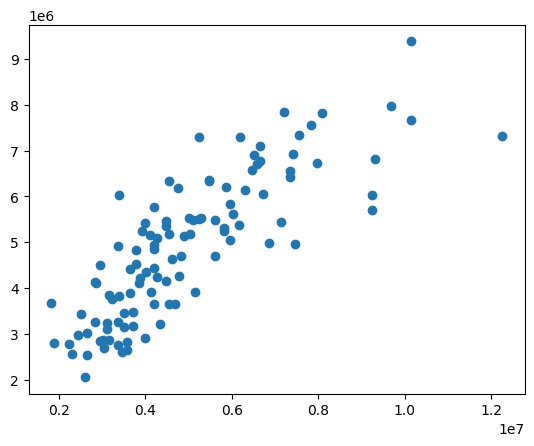

In [33]:
plt.scatter(y_test, y_pred)